In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
def plot(axes, x, y, title):
    axes.scatter(x, y, s=6)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [3]:
import recopilar_data
data_raw = pd.read_csv('data.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw.head(10)

,size,job,temperature,energy,energy^2,magnetization,magnetization^2,amag
0,20,2,2.94,-336.198321,114482.258297,-0.766094,4209.221911,0.766094
1,20,2,2.66,-393.892043,157006.362255,-3.158737,10753.551379,3.158737
2,20,2,2.64,-401.879248,163301.393043,-9.892043,13599.161935,9.892043
3,20,2,1.86,-734.082367,539534.451819,-379.436226,144070.741303,379.436226
4,20,2,2.50,-454.502999,209398.365454,-43.638545,25578.565374,43.638545
5,20,2,1.20,-795.416234,632726.224710,-398.805278,159048.502199,398.805278
6,20,2,1.74,-753.468213,568170.389444,-386.101559,149132.583766,386.101559
7,20,2,2.34,-523.109156,277124.900440,110.125550,51357.405838,110.125550
8,20,2,1.66,-764.439824,584698.562175,-389.776889,151962.091963,389.776889
9,20,2,2.38,-504.371052,257418.734906,-191.033986,47242.232707,191.033986


In [4]:
data = data_raw.groupby(['size','temperature'], as_index=False).mean().drop('job', axis=1)
i = 85
data.loc[i:i+10]

,size,temperature,energy,energy^2,magnetization,magnetization^2,amag
85,20,3.1,-311.489964,9.838480e+04,1.234626,3.792775e+03,4.555378
86,20,3.2,-298.522991,9.046511e+04,-4.543782,3.295827e+03,4.563774
87,20,3.3,-285.519712,8.281469e+04,0.685886,2.947366e+03,2.684606
88,20,3.4,-274.366733,7.649684e+04,0.379208,2.686251e+03,2.847341
89,20,3.5,-264.398880,7.110792e+04,0.157777,2.508283e+03,1.116753
90,20,3.6,-254.957537,6.617862e+04,-0.162095,2.281144e+03,3.458377
91,20,3.7,-244.859016,6.111259e+04,1.878049,2.071118e+03,2.357537
92,20,3.8,-237.975370,5.778524e+04,2.629028,1.946607e+03,3.044702
93,20,3.9,-230.342743,5.415554e+04,0.136186,1.846350e+03,1.542183
94,20,4.0,-223.029028,5.085125e+04,1.039264,1.666190e+03,1.646541


In [5]:
data['N'] = data['size']**2
data['Cv'] = (data['energy^2']-data['energy']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2']-data['amag']**2)*data['N']/data['temperature']
data['E'] = data['energy'] / data['N']
data['M'] = data['amag'] / data['N']



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


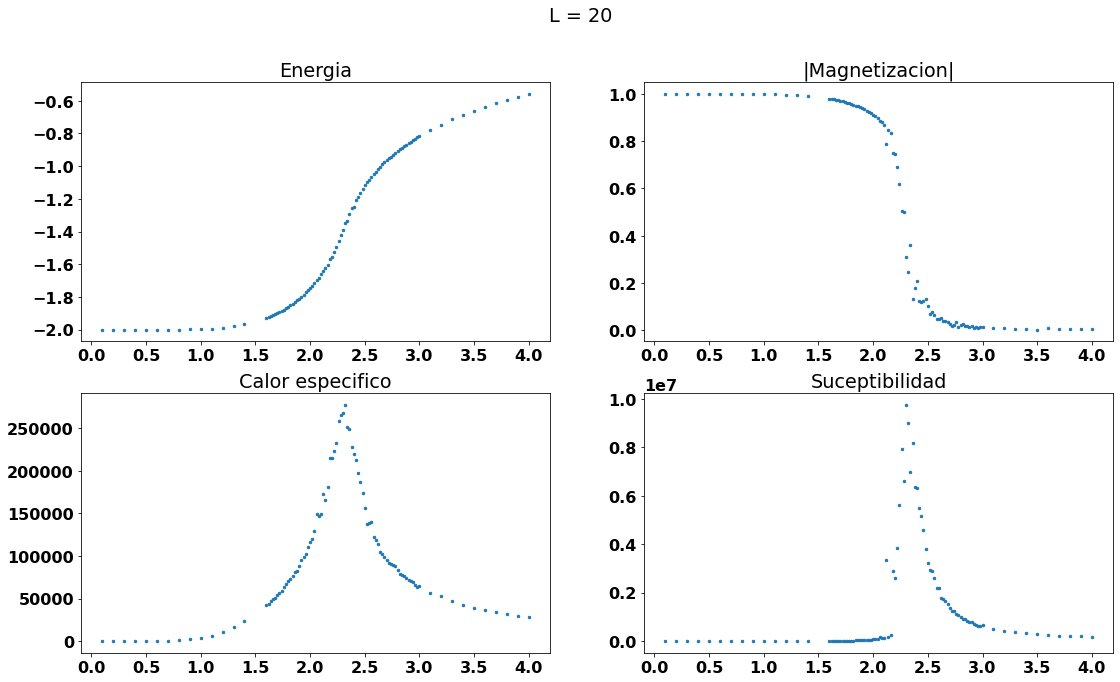

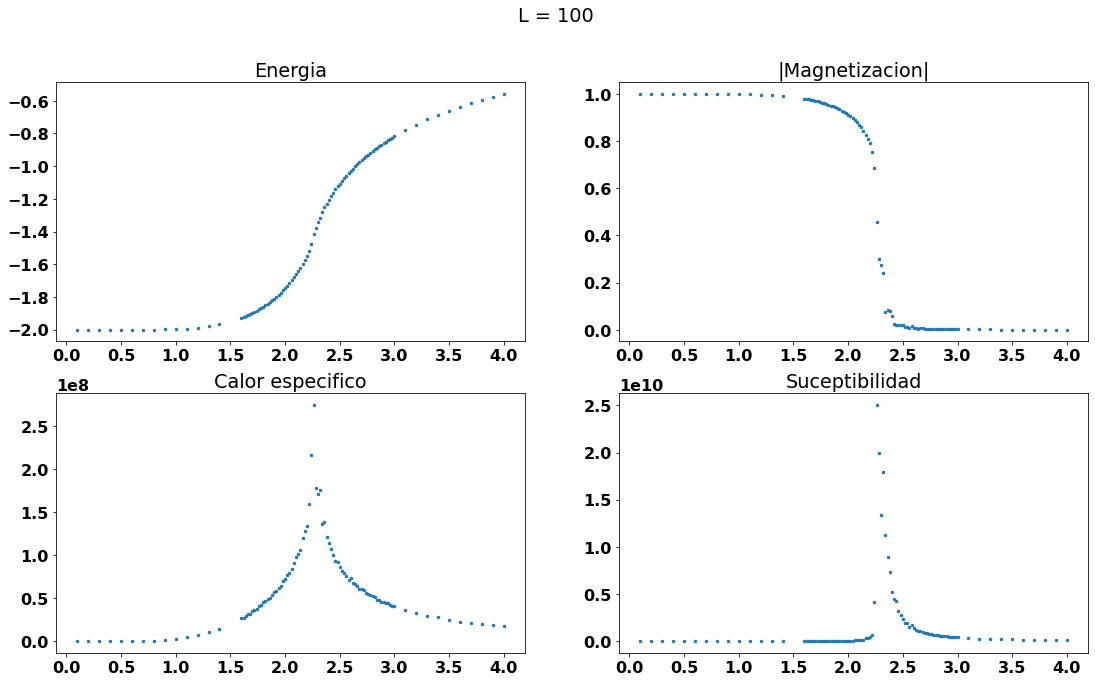

In [6]:
for s in data['size'].unique():
    dataf = data[data['size']==s]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(f'L = {s}')
    plot(ax2, dataf['temperature'], dataf['M'], '|Magnetizacion|')
    plot(ax1, dataf['temperature'], dataf['E'], 'Energia')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')

plt.show()